## Задача для модуля 13.9.

Закрепление знаний по визуализации и аналитике данных.

### 0. Получение данных

In [123]:
import pandas as pd # Импорт библиотеки pandas


churn_data = pd.read_csv('data/churn.csv') # Читаем данные из файла
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Описание данных

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [124]:
# Сделаем копию данных и будем работать с новым DataFrame

churn_df = churn_data
churn_df.drop('RowNumber',inplace=True,axis=1)

In [125]:
churn_df.info()
churn_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [126]:
# Посчитаем число ушедших и оставшихся в банке клиентов

values_exit = churn_df['Exited'].value_counts()
display(values_exit)

0    7963
1    2037
Name: Exited, dtype: int64

<bound method Figure.show of <Figure size 720x360 with 2 Axes>>

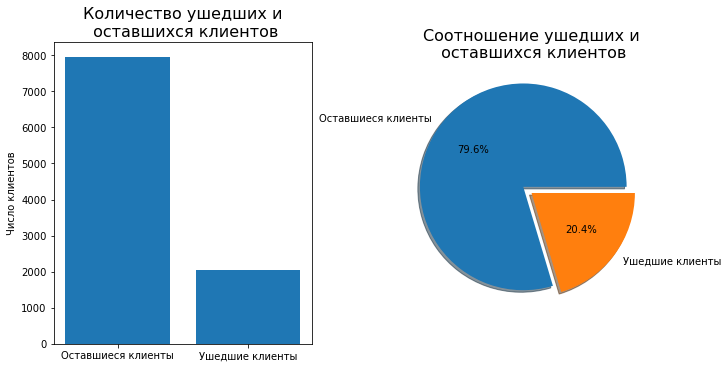

In [127]:
import matplotlib.pyplot as plt # Импортируем модуль matplotlib.pypplot для построения простых визуализаций
%matplotlib inline

# Посмотрим на разницу ушедших и лояльных клиентов

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),constrained_layout=True)

axes[0].bar(
    x = ['Оставшиеся клиенты','Ушедшие клиенты'], 
    height = values_exit
    )
axes[0].set_ylabel('Число клиентов')
axes[0].set_title('Количество ушедших и\n оставшихся клиентов', fontsize=16)

axes[1].pie(
    values_exit,
    labels=['Оставшиеся клиенты','Ушедшие клиенты'],
    autopct='%.1f%%',
    explode = [0.1, 0],
    shadow=True,
    normalize=True,
)
axes[1].set_title('Соотношение ушедших и\n оставшихся клиентов', fontsize=16)
fig.show

#### Выводы:

Из визуализации видно, что примерно 20% клиентов уходит из банка.

### 2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [128]:
churn_df[churn_df['Balance'] > 2500] # Выведем данные по клиентов с балансом на счете более 2500 долларов

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Text(0, 0.5, 'Количество клиентов')

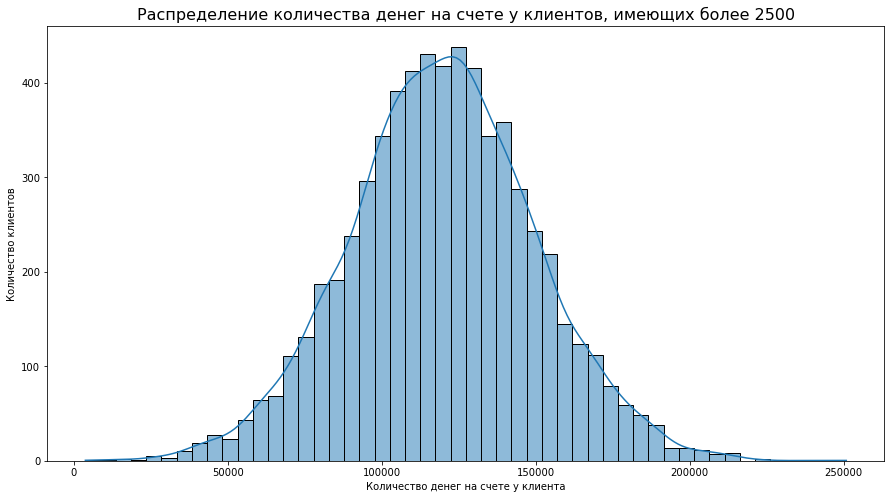

In [129]:
import seaborn as sns # Импортируем более продвинутую библиотеку для визуализации seaborn

# Посмотрим распределение баланса на счетах у клиентов
fig, axes = plt.subplots(figsize=(15, 8))
sns.histplot(
    data=churn_df,
    x=churn_df[churn_df['Balance'] > 2500]['Balance'],
    bins=50,
    kde=True,
);

axes.set_title('Распределение количества денег на счете у клиентов, имеющих более 2500', fontsize=16)
axes.set_xlabel('Количество денег на счете у клиента')
axes.set_ylabel('Количество клиентов')

#### Выводы:
Из распределения видно, что оно имеет ярко выраженную нормальную форму с пиком около 125000 долларов

### 3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Text(0, 0.5, 'Количество клиентов')

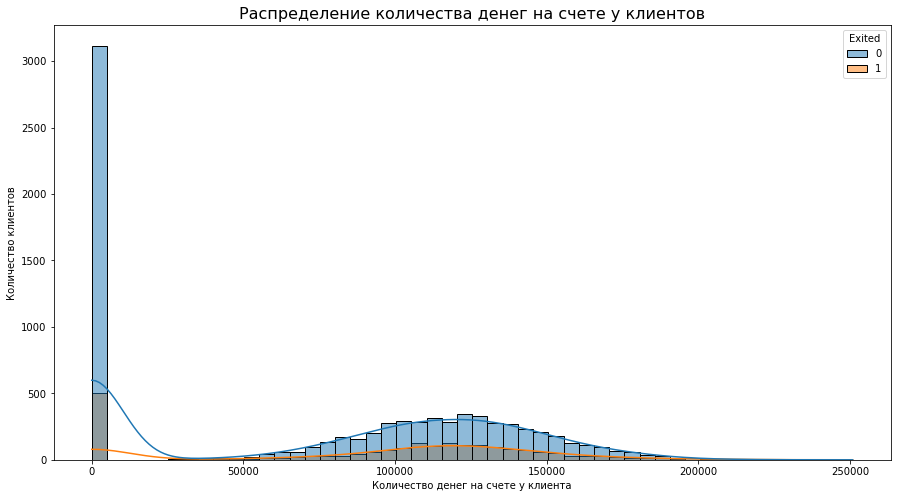

In [130]:
# Сравним распределения средств на счетах лояльных и ушедших клиентов
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
sns.histplot(
    data=churn_df['Balance'],
    x=churn_df['Balance'],
    hue=churn_df['Exited'],
    bins=50,
    kde=True,
);

axes.set_title('Распределение количества денег на счете у клиентов', fontsize=16)
axes.set_xlabel('Количество денег на счете у клиента')
axes.set_ylabel('Количество клиентов')

##### Промежуточные выводы:
Видно, что распределения весьма похожи по форме и аномалия присутствует только в районе нуля, как у лояльных, так и ушедших. Видно, что по каждой корзине баланса ушедших клиентов примерно в 2 раза меньше, чем лояльных. Это не так только для клиентов с вкладами до 2500, в этой категории ушедших клиентов в 6 раз меньше, чем лояльных.
Скорее всего, необходимо разделить клиентов на 2 большие категории: со складами до 2500 долларов и более 2500. В этих двух больших категория могут быть признаки, которые влияют на статус лояльности по-разному.

In [131]:
# Разделим данные на две таблицы, чтобы анализировать их раздельно

churn_hibal = churn_df[churn_df['Balance'] > 2500].reset_index()
churn_lowbal = churn_df[churn_df['Balance'] <= 2500].reset_index()
churn_hibal.drop('index',inplace=True,axis=1)
churn_lowbal.drop('index',inplace=True,axis=1)

churn_hibal['Exited'] = churn_hibal['Exited'].astype('category')
churn_hibal['Exited'] =  churn_hibal['Exited'].cat.rename_categories(['Лояльный','Ушедший'])
churn_lowbal['Exited'] = churn_lowbal['Exited'].astype('category')
churn_lowbal['Exited'] = churn_lowbal['Exited'].cat.rename_categories(['Лояльный','Ушедший'])

display(churn_hibal)
display(churn_lowbal)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Лояльный
1,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Ушедший
2,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Лояльный
3,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,Ушедший
4,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,Ушедший
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,Ушедший
6379,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,Лояльный
6380,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,Лояльный
6381,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,Ушедший


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,Ушедший
1,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.63,Лояльный
2,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.80,Лояльный
3,15737173,Andrews,497,Spain,Male,24,3,0.0,2,1,0,76390.01,Лояльный
4,15632264,Kay,476,France,Female,34,10,0.0,2,1,0,26260.98,Лояльный
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,15605622,McMillan,841,Spain,Male,28,4,0.0,2,1,1,179436.60,Лояльный
3613,15657105,Chukwualuka,726,Spain,Male,36,2,0.0,1,1,0,195192.40,Лояльный
3614,15719294,Wood,800,France,Female,29,2,0.0,2,0,0,167773.55,Лояльный
3615,15606229,Obijiaku,771,France,Male,39,5,0.0,2,1,0,96270.64,Лояльный


Text(0, 0.5, 'Количество клиентов')

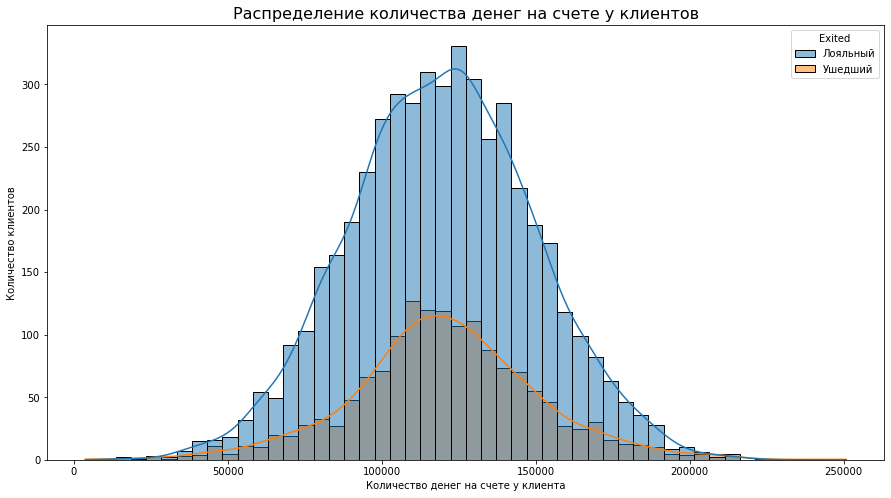

In [132]:
# Построим распределение балансов на счетах по группам ушедших и лояльных клиентов
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
sns.histplot(
    data=churn_hibal['Balance'],
    x=churn_hibal['Balance'],
    hue=churn_hibal['Exited'],
    bins=50,
    kde=True,
);

axes.set_title('Распределение количества денег на счете у клиентов', fontsize=16)
axes.set_xlabel('Количество денег на счете у клиента')
axes.set_ylabel('Количество клиентов')

In [133]:
print('Количество уникальных значений баланса у клиентов с балансом менее 2500: ',churn_lowbal['Balance'].nunique())
print('Минимальное значение на счете в этой группе:', churn_lowbal['Balance'].min())
print('Максимальное значение на счете в этой группе:', churn_lowbal['Balance'].max())

Количество уникальных значений баланса у клиентов с балансом менее 2500:  1
Минимальное значение на счете в этой группе: 0.0
Максимальное значение на счете в этой группе: 0.0


#### Выводы:

Имеет смысл разделить всех клиентов на две большие группы и анализировать их признаки раздельно, так как скорее всего они пользуются разными продуктами, и, как следствие, причины ухода могут быть разные.


### 4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Text(0, 0.5, 'Количество клиентов')

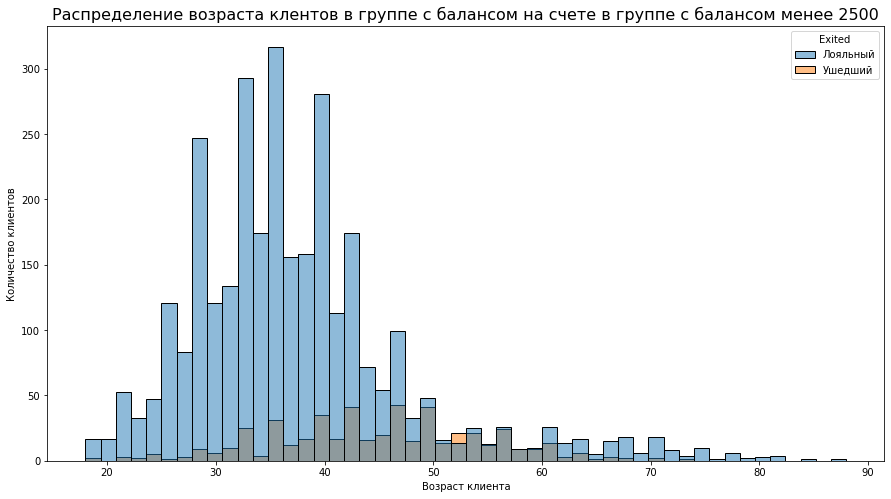

In [134]:
# Посмотрим на возрастное распределение в группе со вкладом до 2500:

fig, axes = plt.subplots(figsize=(15, 8))
sns.histplot(
    data=churn_lowbal['Age'],
    x=churn_lowbal['Age'],
    hue=churn_lowbal['Exited'],
    bins=50,
);

axes.set_title('Распределение возраста клентов в группе с балансом на счете в группе с балансом менее 2500', fontsize=16)
axes.set_xlabel('Возраст клиента')
axes.set_ylabel('Количество клиентов')

Text(0, 0.5, 'Количество клиентов')

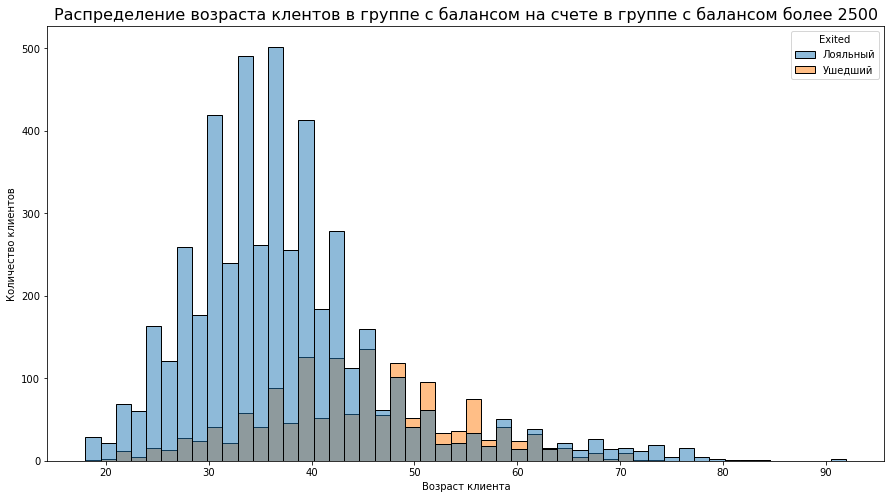

In [135]:
# Посмотрим на возрастное распределение в группе со вкладом более 2500:

fig, axes = plt.subplots(figsize=(15, 8))
sns.histplot(
    data=churn_hibal['Age'], 
    x=churn_hibal['Age'],
    hue=churn_hibal['Exited'], 
    bins=50,
)

axes.set_title('Распределение возраста клентов в группе с балансом на счете в группе с балансом более 2500', fontsize=16)
axes.set_xlabel('Возраст клиента')
axes.set_ylabel('Количество клиентов')

### Выводы:

В обеих группах хорошо видно, что повышенный отток клиентов приходится на возраст с 35 до примерно 52 лет. Пиковое значение в районе 47.

### 5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Text(0, 0.5, 'Предполагаемая зарплата')

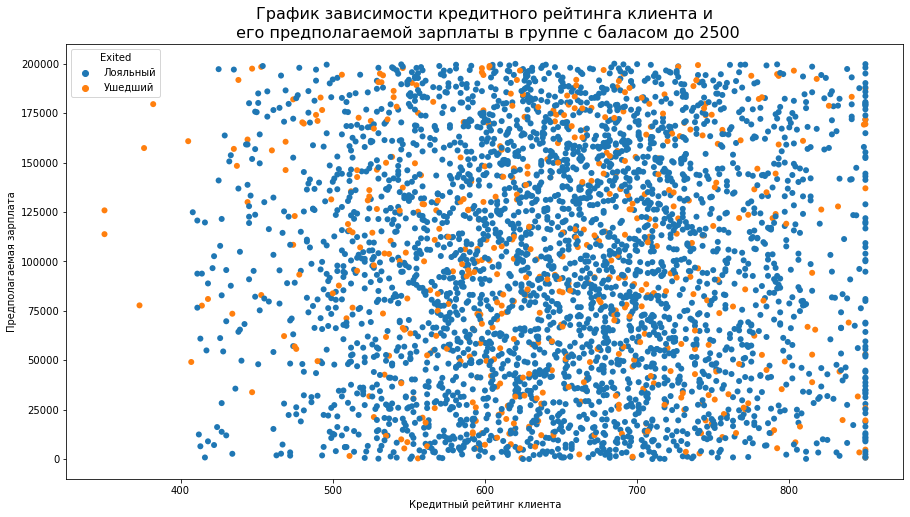

In [136]:
# Посмотрим на зависимость кридетного рейтинга клиента и предполагаемой зарплаты для группы с балансом до 2500:

fig, axes = plt.subplots(figsize=(15, 8))

sns.scatterplot(x="CreditScore", 
    y="EstimatedSalary",
    hue="Exited", 
    sizes=(1, 8), 
    linewidth=0,
    data=churn_lowbal, 
    ax=axes
)

axes.set_title('График зависимости кредитного рейтинга клиента и\n его предполагаемой зарплаты в группе с баласом до 2500', fontsize=16)
axes.set_xlabel('Кредитный рейтинг клиента')
axes.set_ylabel('Предполагаемая зарплата')

Text(0, 0.5, 'Предполагаемая зарплата')

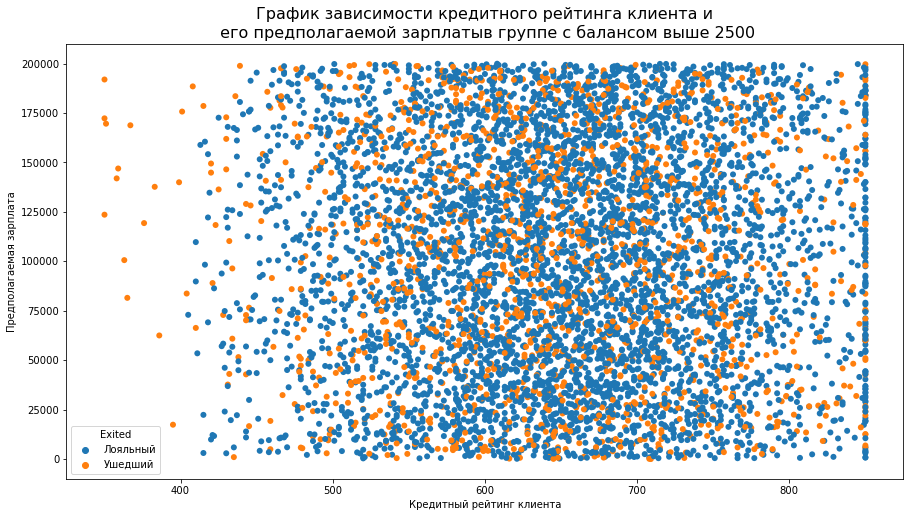

In [137]:
# Посмотрим на зависимость кридетного рейтинга клиента и предполагаемой зарплаты для группы с балансом более 2500:

fig, axes = plt.subplots(figsize=(15, 8))

sns.scatterplot(x="CreditScore", 
    y="EstimatedSalary",
    hue="Exited", 
    sizes=(1, 8), 
    linewidth=0,
    data=churn_hibal, 
    ax=axes
)

axes.set_title('График зависимости кредитного рейтинга клиента и\n его предполагаемой зарплатыв группе с балансом выше 2500', fontsize=16)
axes.set_xlabel('Кредитный рейтинг клиента')
axes.set_ylabel('Предполагаемая зарплата')

#### Выводы:
Видно, что нет ярко выраженной взаимосвязи кредитного рейтинга и предполагаемой зарплаты отсутствует для обеих групп.

### 6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [317]:
churn_gend = churn_df.groupby(by=['Gender','Exited'])['CustomerId'].count() # Посчитаем количество женщин и мужчин по оттоку
churn_gend = list(churn_gend)
churn_gend_list = ['Лояльные','Ушедшие','Лояльные','Ушедшие ']

<bound method Figure.show of <Figure size 720x720 with 1 Axes>>

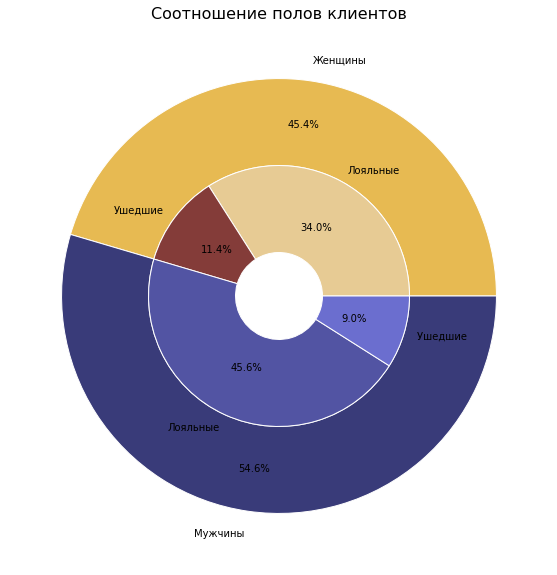

In [356]:
import numpy as np

# Сделаем список значений для внешнего круга диаграммы
churn_gend_sums = list()

churn_gend_sums.append(churn_gend[0]+churn_gend[1])
churn_gend_sums.append(churn_gend[2]+churn_gend[3])

fig, axes = plt.subplots(figsize=(10, 10),facecolor='white')
offset = 0.4

# Определим цвета диаграммы
cmap = plt.get_cmap("tab20b")
b_colors = cmap(np.array([10, 0]))
sm_colors = cmap(np.array([11, 12, 1, 2,]))


# Построим внешний круг
axes.pie(
    churn_gend_sums, 
    radius=1,
    labels=['Женщины','Мужчины'],
    normalize=True,
    wedgeprops=dict(width=offset, edgecolor='w'),
    colors=b_colors,
    autopct='%1.1f%%',
    pctdistance = 0.8,
)

# Построим внутренний круг
axes.pie(
    churn_gend, 
    radius=1-offset,
    labels=churn_gend_list,
    normalize=True,
    wedgeprops=dict(width=offset, edgecolor='w'),
    colors=sm_colors,
    autopct='%1.1f%%'    
)

axes.set_title('Соотношение полов клиентов', fontsize=16)

fig.show

#### Выводы:
Видно, что в группе ушедших клиентах преобладают женщины, тогда как в группе лояльных клиентах, наоборот, преобладают мужчины.

### 7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Text(0.5, 0, 'Количество клиентов')

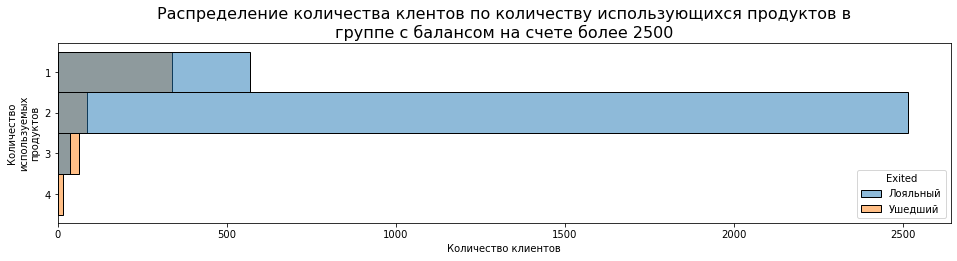

In [197]:
churn_lowbal['NumOfProducts'] = churn_lowbal['NumOfProducts'].astype('category') # Переведем количество продуктов а разряд категорий

# Построим распеределение количества клиентов по количеству продуктов в разрезе ушедших и лояльных с балансом менее 2500
fig, axes = plt.subplots(figsize=(16, 3.3))
sns.histplot(
    data=churn_lowbal['NumOfProducts'],
    y=churn_lowbal['NumOfProducts'],
    hue=churn_lowbal['Exited'],
)

axes.set_title('Распределение количества клентов по количеству использующихся продуктов в\nгруппе \
с балансом на счете менее 2500', fontsize=16)
axes.set_ylabel('Количество\nиспользуемых\nпродуктов')
axes.set_xlabel('Количество клиентов')

Text(0.5, 0, 'Количество клиентов')

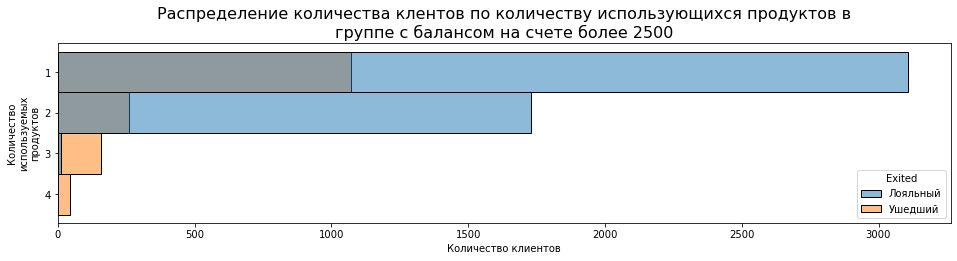

In [195]:
churn_hibal['NumOfProducts'] = churn_hibal['NumOfProducts'].astype('category')

# Построим распеределение количества клиентов по количеству продуктов в разрезе ушедших и лояльных с балансом более 2500
fig, axes = plt.subplots(figsize=(16, 3.3))
sns.histplot(
    data=churn_hibal['NumOfProducts'],
    y=churn_hibal['NumOfProducts'],
    hue=churn_hibal['Exited'],    
)

axes.set_title('Распределение количества клентов по количеству использующихся продуктов в\nгруппе \
с балансом на счете более 2500', fontsize=16)
axes.set_ylabel('Количество\nиспользуемых\nпродуктов')
axes.set_xlabel('Количество клиентов')

#### Выводы:
В обеих группах ушедшие клиенты приобрели у банка 1 услугу. При этом в группе с балансом до 2500 количество ушедших клиентов немного больше лояльных, а в группе с балансом более 2500 около трети.

Кроме того, отток клиентов, которые купили более двух продуктов выше количества лояльных клиентов в обеих категориях. В категории клиентов до 2500 отток клиентов превышает количество лояльных примерно в два раза, а у клиентов с балансом более 2500 более чем в 10 раз.

### 8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0.5, 0, 'Количество клиентов')

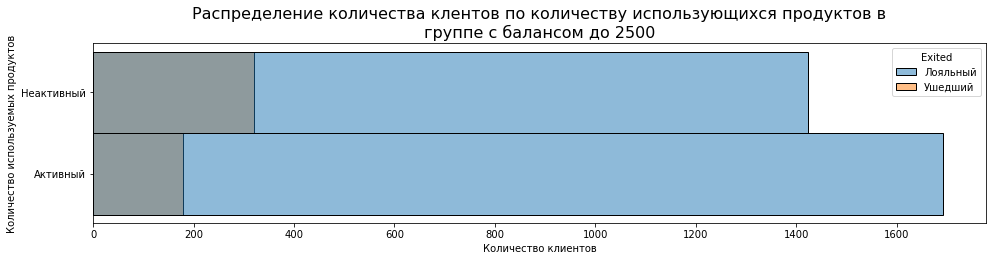

In [206]:
# Переведем индикатор активности в категорию и переименуем
churn_lowbal['IsActiveMember'] = churn_lowbal['IsActiveMember'].astype('category')
churn_lowbal['IsActiveMember'] = churn_lowbal['IsActiveMember'].cat.rename_categories(['Неактивный','Активный'])

# Построим распределением клиентов по количеству использующихся продуктов в группе до 2500 баланса
fig, axes = plt.subplots(figsize=(16, 3.3))
sns.histplot(
    data=churn_lowbal['IsActiveMember'],
    y=churn_lowbal['IsActiveMember'],
    hue=churn_lowbal['Exited'],
    bins=2
);

axes.set_title('Распределение количества клентов по количеству использующихся продуктов в\nгруппе \
с балансом до 2500', fontsize=16)
axes.set_ylabel('Количество используемых продуктов')
axes.set_xlabel('Количество клиентов')

Text(0.5, 0, 'Количество клиентов')

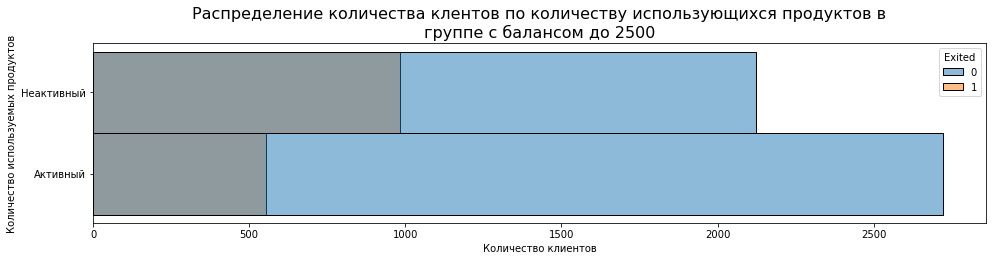

In [220]:
# Переведем индикатор активности в категорию и переименуем
churn_hibal['IsActiveMember'] = churn_hibal['IsActiveMember'].astype('category')
churn_hibal['IsActiveMember'] = churn_hibal['IsActiveMember'].cat.rename_categories(['Неактивный','Активный'])

# Построим распределением клиентов по количеству использующихся продуктов в группе более 2500 баланса
fig, axes = plt.subplots(figsize=(16, 3.3))
sns.histplot(
    data=churn_hibal['IsActiveMember'],
    y=churn_hibal['IsActiveMember'],
    hue=churn_hibal['Exited'],
    bins=2
);

axes.set_title('Распределение количества клентов по количеству использующихся продуктов в\nгруппе \
с балансом до 2500', fontsize=16)
axes.set_ylabel('Количество используемых продуктов')
axes.set_xlabel('Количество клиентов')

#### Выводы:
На распределениях видно, что отток неактивных клиентов в обеих категориях выше, чем отток активных клиентов.

При этом банк следует обратить внимание именно на отток клиентов в разрезе их активности на группу с балансом более 2500 на счете, так как там соотношение оттока и лояльности выше, чем в группе с балансом на счете менее 2500.

### 9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
# Импортируем библиотеку plotly для работы с продвинутой графикой
import plotly
import plotly.express as px

In [212]:
# Переполучим таблицы, чтобы обнулить категории и раотать с числовыми значениями
churn_hibal = churn_df[churn_df['Balance'] > 2500].reset_index()
churn_lowbal = churn_df[churn_df['Balance'] <= 2500].reset_index()
churn_hibal.drop('index',inplace=True,axis=1)
churn_lowbal.drop('index',inplace=True,axis=1)

Geography
France     0.182203
Germany    0.324432
Spain      0.195618
Name: Exited, dtype: float64

In [232]:
# Построим тепловую карту распределения оттока клиентов с балансом менее 2500

fig = px.choropleth(
    data_frame=churn_lowbal.groupby(by='Geography')['Exited'].mean(), #DataFrame
    locations=churn_lowbal.groupby(by='Geography')['Exited'].mean().index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    title='Распредление оттока клиентов с балансом на счете менее 2500', #заголовок
    width=800, #ширина
    height=500, #высота
    range_color=[0, 0.33], #диапазон цвета
    color_continuous_scale='Reds' #палитра цветов
)

fig.show()

In [231]:
# Построим тепловую карту распределения оттока клиентов с балансом менее 2500

fig = px.choropleth(
    data_frame=churn_hibal.groupby(by='Geography')['Exited'].mean(), #DataFrame
    locations=churn_hibal.groupby(by='Geography')['Exited'].mean().index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    title='Распредление оттока клиентов с балансом на счете более 2500', #заголовок
    width=800, #ширина
    height=500, #высота
    range_color=[0, 0.33], #диапазон цвета
    color_continuous_scale='Reds' #палитра цветов
)

fig.show()

#### Выводы:
Наибольший отток клиентов наблюдается в Германии в группе с балансом на счете более 2500 долларов.

Вполне возможно, это может быть связано с тем, что в Германии клиентами банска являются более возрастные люди, и, как показано выше, отток в более возрастных группах выше, соответственно эти два фактора накладывают друг на друга.

### 10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

```
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
```

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [233]:
def get_credit_score_cat(credit_score):
    """Функция категоризации кредитного рейтинга

    Args:
        credit_score ([int]): кредитный рейтинг из таблицы

    Returns:
        [string]: категория кредитного рейтинга
    """
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [244]:
# Вычислим категории рейтинга для двух групп (до 2500 и более)

churn_hibal['CreditScoreCat'] = churn_hibal['CreditScore'].apply(get_credit_score_cat)
churn_lowbal['CreditScoreCat'] = churn_lowbal['CreditScore'].apply(get_credit_score_cat)

display(churn_hibal.head())
display(churn_lowbal.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,Активный,112542.58,0,Fair
1,15619304,Onio,502,France,Female,42,8,159660.80,3,1,Неактивный,113931.57,1,Poor
2,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,Активный,79084.10,0,Excellent
3,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,Неактивный,149756.71,1,Fair
4,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,Неактивный,119346.88,1,Very_Poor


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,Fair
1,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.63,0,Good
2,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.80,0,Excellent
3,15737173,Andrews,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0,Very_Poor
4,15632264,Kay,476,France,Female,34,10,0.0,2,1,0,26260.98,0,Very_Poor


In [249]:
# Создадим таблицы для построения тепловых карт по двум группам (до 2500 и более)

temp_hibal = churn_hibal.groupby(by=['CreditScoreCat','Tenure'])['Exited'].mean().unstack()
temp_lowbal = churn_lowbal.groupby(by=['CreditScoreCat','Tenure'])['Exited'].mean().unstack()

display(temp_lowbal)
print(temp_lowbal.index)
print(temp_lowbal.columns)

display(temp_hibal)
print(temp_hibal.index)
print(temp_hibal.columns)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.176471,0.166667,0.176471,0.147059,0.064516,0.153846,0.138889,0.060606,0.135135,0.138889,0.125000
Fair,0.179487,0.162162,0.180723,0.112500,0.147059,0.186667,0.170455,0.132653,0.098765,0.070423,0.177778
Good,0.140000,0.158730,0.165517,0.140625,0.139860,0.100719,0.099174,0.139706,0.074627,0.125828,0.161290
Poor,0.071429,0.176471,0.172043,0.102273,0.181818,0.114583,0.125000,0.104167,0.109890,0.175000,0.142857
Very_Poor,0.333333,0.235294,0.111111,0.272727,0.117647,0.120000,0.269231,0.130435,0.100000,0.090909,0.307692


Index(['Excellent', 'Fair', 'Good', 'Poor', 'Very_Poor'], dtype='object', name='CreditScoreCat')
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='Tenure')


Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.347826,0.227273,0.117647,0.179104,0.166667,0.294118,0.313725,0.163934,0.230769,0.350000,0.314286
Fair,0.245283,0.243056,0.231293,0.271523,0.220000,0.216561,0.280303,0.193939,0.263804,0.246667,0.223881
Good,0.233645,0.225191,0.200000,0.240664,0.230088,0.278226,0.227074,0.222222,0.198238,0.241071,0.216667
Poor,0.282051,0.310976,0.234568,0.273885,0.272727,0.257143,0.216783,0.183099,0.275641,0.291391,0.184211
Very_Poor,0.466667,0.260000,0.179487,0.292683,0.365854,0.166667,0.200000,0.250000,0.313725,0.307692,0.357143


Index(['Excellent', 'Fair', 'Good', 'Poor', 'Very_Poor'], dtype='object', name='CreditScoreCat')
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='Tenure')


Text(0.5, 51.0, 'Время пользования услугами банка')

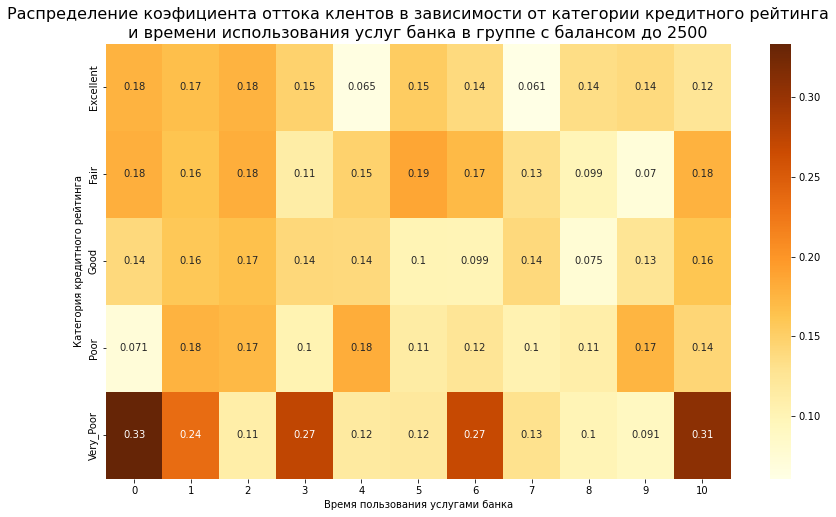

In [258]:
# Построим тепловую карту оттока клиентов в зависимости  от категории кредитного рейтинга 
# и времени пользования улугами банка для группы с балансом менее 2500

fig = plt.subplots(figsize=(14,8),facecolor='white')
axes = sns.heatmap(temp_lowbal,annot=True,cmap='YlOrBr')

axes.set_title(
'Распределение коэфициента оттока клентов в зависимости от категории \
кредитного рейтинга\nи времени использования услуг банка в группе с балансом до 2500',
    fontsize=16
)
axes.set_ylabel('Категория кредитного рейтинга')
axes.set_xlabel('Время пользования услугами банка')

Text(0.5, 51.0, 'Время пользования услугами банка')

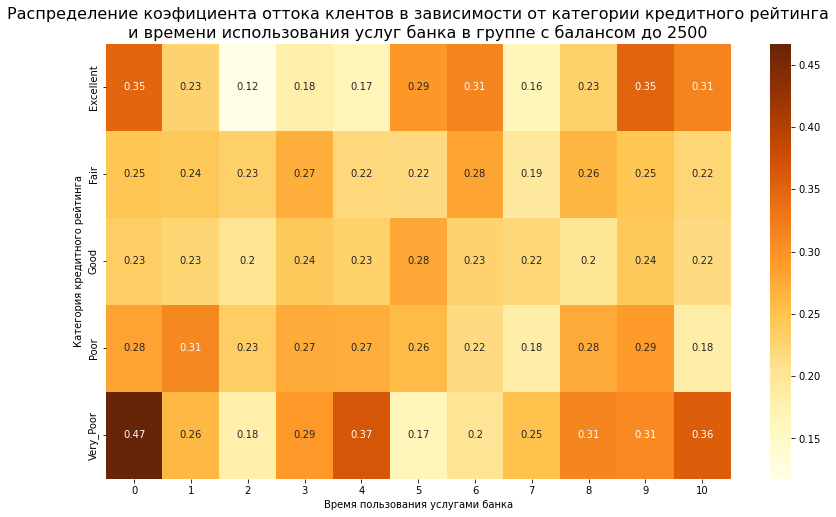

In [259]:
# Построим тепловую карту оттока клиентов в зависимости  от категории кредитного рейтинга 
# и времени пользования улугами банка для группы с балансом более 2500

fig = plt.subplots(figsize=(14,8),facecolor='white')
axes = sns.heatmap(temp_hibal,annot=True,cmap='YlOrBr')

axes.set_title(
'Распределение коэфициента оттока клентов в зависимости от категории \
кредитного рейтинга\nи времени использования услуг банка в группе с балансом до 2500',
    fontsize=16
)
axes.set_ylabel('Категория кредитного рейтинга')
axes.set_xlabel('Время пользования услугами банка')

#### Выводы:
Исходя из полученной визуализации, видно, что наибольший отток клиентов наблюдается в обеих группах у клиентов с низким кредитным рейтингом. При этом Для группы клиентов с балансом менее и более 2500 на счете выделаются разные группы по времени пользования банковскими услугами.